# MATH 210 Project A

Project members:

* William Kendrick: 72587512
* Alessandro Adami: 32441974
* Sean Donaghy: 93591923

## Background Information
* Spruce Budworms are a species of bug which causes defoliation in both birch and fir trees.
* This defoliation weakens and kills trees over several years.

### Short Term Dynamics:

* Spruce Budworms reproduce and eat new and year old foliage.
* Spruce Budworm predators don't reproduce quickly.
* Predators are busy eating other insects and don't bother searching for Spruce Budworms until they are plentiful.

### Ludwig et.al model

Ludwig et al. (1978) described the population dynamics of Spruce Budworms using the following model: 

$$
\frac{dB}{dt} = r_BB(1-\frac{B}{K_B}) - \beta \frac{B^2}{\alpha^2 + B^2}
$$


where:

* $B$ is the size of the budworm population
* $r_B$ is the growth rate constant for budworm
* $K_B$ is the carrying capacity of the budworm in the abscence of predation
* $\beta$ is the strength of predation
* $\alpha$ is related to the budworm population size

## Main goal:

We want to approximate all of the steady state solutions for a chosen set of paramters.
Next we want to classify each steady state solution and then discuss how the steady states change when we modulate the parameters.

## Step 1
Write a Python function called f which takes input parameters `B, r, K, beta, alpha`, and `n`, and returns
the value of the right hand side of the differential equation:

$$
f(B;r,K,\beta,\alpha,n) = r_BB(1-\frac{B}{K_B}) - \beta \frac{B^n}{\alpha^n + B^n}
$$

In [54]:
def f(B: int,
      r: float,
      K: float, 
      beta: float, 
      alpha: float, 
      n: float)->float:
    
    value = r*B*(1 - B/K) - beta*(B**n/(alpha**n + B**n))
    return value


# Tests
assert(f(1,5,5,5,5,5)) == 5*1*(1-1/5) - 5*(1**5/(5**5 + 1**5))
assert(f(2,30,4,10,2,6)) == 30*2*(1-2/4) - 10*(2**6/(2**6 + 2**6))


## Step 2
Compute the derivative of $f$ with respect to $B$. Write a Python function called df which takes input
parameters `B, r, K, beta, alpha`, and `n`, and returns $f ′(B; r, K, \beta, \alpha, n)$.

In [55]:
def df(B: int, 
       r: float, 
       K: float, 
       beta: float, 
       alpha: float, 
       n: float)->float:
    
    value = r-2*r*B/K - beta*alpha**n*n*B**(n-1)/(alpha**n + B**n)**2
    return value

# Tests
assert(df(1,2,3,4,5,6)) == 2-2*2*1/3 - 4*5**6*6*1**(5)/(5**6+1**6)**2

## Step 3
Choose `r = 1, K = 100, β = 10, α = 5, and n = 4`. Use the following Python code to plot f (B).

### DON'T CHANGE THE NEXT TWO CELLS

In [77]:
# Parameters
r = 1
K = 100
beta = 10
alpha = 5
n = 4

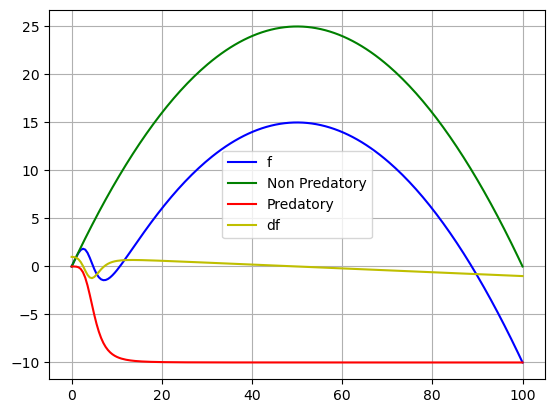

In [78]:
import numpy as np
import matplotlib.pyplot as plt

B = np.linspace(0,100,200)

# Entire RHS is blue line
fB = f(B=B, r=r, K=K, beta=beta, alpha=alpha, n=n)
plt.plot(B,fB, 'b', label="f"), plt.grid(True)

# Non predatory component is green line
gB = r*B*(1-B/K)
plt.plot(B,gB, 'g', label="Non Predatory")

# Predatory component is red line
qB = -beta*B**n/(alpha**n + B**n)
plt.plot(B,qB, 'r', label="Predatory")

# df is yellow line
dfB = df(B=B, r=r, K=K, beta=beta, alpha=alpha, n=n)
plt.plot(B,dfB, 'y', label="df")

plt.legend()
plt.show()

### Test Different Parameters HERE

In [74]:
# Parameters
r = 2
K = 100
beta = 10
alpha = 5
n = 4

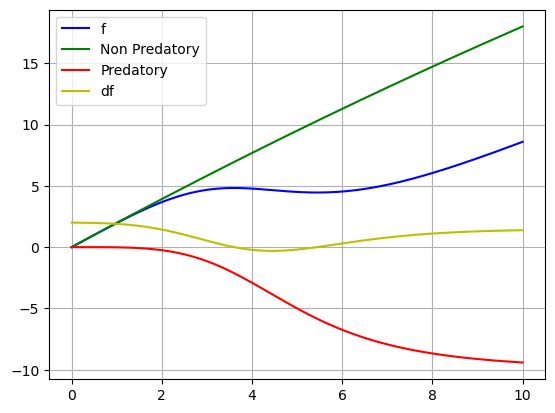

In [75]:
import numpy as np
import matplotlib.pyplot as plt

B = np.linspace(0,10,200)

# Entire RHS is blue line
fB = f(B=B, r=r, K=K, beta=beta, alpha=alpha, n=n)
plt.plot(B,fB, 'b', label="f"), plt.grid(True)

# Non predatory component is green line
gB = r*B*(1-B/K)
plt.plot(B,gB, 'g', label="Non Predatory")

# Predatory component is red line
qB = -beta*B**n/(alpha**n + B**n)
plt.plot(B,qB, 'r', label="Predatory")

# df is yellow line
dfB = df(B=B, r=r, K=K, beta=beta, alpha=alpha, n=n)
plt.plot(B,dfB, 'y', label="df")

plt.legend()
plt.show()

## Step 4
Use Newton’s method to approximate all steady state solutions for the parameter values chosen in the
previous part. Classify the steady states

#### Newtons Methods

Let $f(x)$ be a differentiable function and suppose 
there exists a root $r$ of $f(x)$ in $[a,b]$.
We can approximate $f(x)$ by the tangent line at $x_0$ near $r$:
$$y = f'(x_0)(x-x_0)+f(x_0)$$

Find $x$ where the tangent line crosses the $x$-axis and that point should be closer to $r$

$$0 = f'(x_0)(x_1-x_0) + f(x_0)$$

$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$ and repeat this!

$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$ 
And we hope 

$$x_n \rightarrow r$$ as $$n \rightarrow \infty$$

In [58]:
def newtons(a: float, N: int)->float:
    """
    Finds the roots of f using Newton's method

    Args:
        a (float): The first value from which to start the iterations
        N   (int): The number of iterations

    Returns:
        root (float): The root of the function, for the given a value
        
    """
    B = [a]
    
    for i in range(N+1):
        B.append(B[i] - f(B=B[i], r=r, K=K, beta=beta, alpha=alpha, n=n)/df(B=B[i], r=r, K=K, beta=beta, alpha=alpha, n=n))
   
    root = B[-1]
    
    return root

print(newtons(0,100))
print(newtons(5,100))
print(newtons(15,100))
print(newtons(900,100))


0.0
4.780238130446593
10.683617545652401
88.72996363422153


### Solutions

We have found that $f=0$ at:

$B= 0$

$B=4.78$

$B=10.68$

$B=88.73$

At these values of B, we have $\frac{dB}{dt}=0$ and thus steady states, where the budworm population is not changing.

From a graphical analysis, we can see at $B_1=4.78$ and $B_2=88.73$ that $df<0$ which means if B= were to increase by a small amount from $B_1$ or $B_2$ $\frac{dB}{dt}$ would be negative, and would decrease B back to the steady state.

So $B_1$ and $B_2$ are stable steady states.

On the contrary, at $B_3=0$ and $B_4=10.68$, $df>0$ which means if B were to increase by a small amount fro $B_1$ or $B_2$ $\frac{dB}{dt}$ would be positive, and B would increase further.

So $B_1$ and $B_2$ are unstable steady states.


## Step 5

How do the steady states change when we increase/decrease each of the parameters?

#### K

As K increases, the steady states with small populations of bugs stay relatively the same, for a change of 900 units in K.

However the final steady state, with a large B, had a change proportional to the change in K.

#### r

Increasing r increases the growth rate of the budworm population, with high r values, there is more rapid growth and less fluctuation in B when B is small and predation is just beginning. For large enough r there are only 2 steady states.
